#### 1. Import libraries

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### 2. Read images

In [32]:
img1 = cv2.imread("messi.png")
img2 = cv2.imread("logo.png")

In [33]:
print(img1.shape)
print(img2.shape)

(399, 599, 3)
(222, 180, 3)


#### 3. Create ROI with shape of img2 (logo) at img1

In [34]:
row, column, channel = img2.shape
roi = img1[0:row, 0:column]

#### 4. Convert img2 into Gray Scale 2D & Binary thresholding

In [35]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)

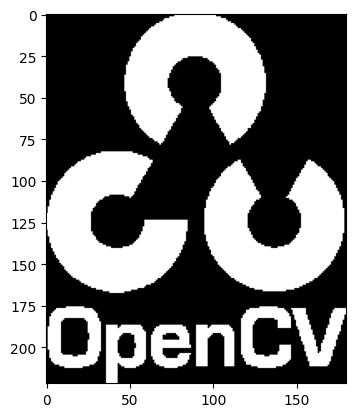

In [36]:
plt.imshow(mask, cmap='gray')
plt.show()

#### 5. Bitwise_not Operation to create inverse mask

In [37]:
mask_inv = cv2.bitwise_not(mask)

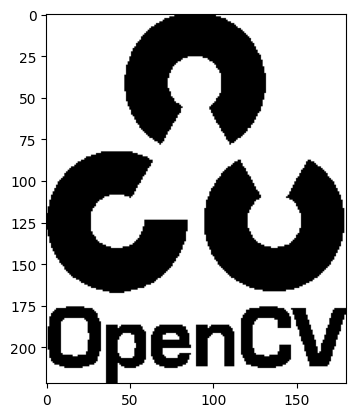

In [38]:

plt.imshow(mask_inv, cmap='gray')
plt.show()

#### 6. Bitwise_and Operation to create background at ROI

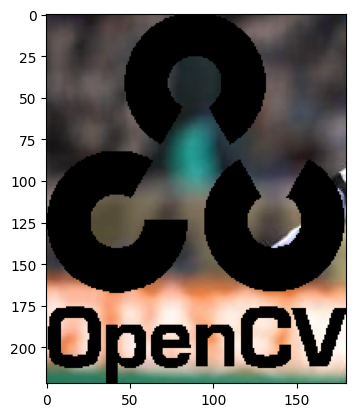

In [39]:
img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
plt.imshow(img1_bg, cmap='gray')
plt.show()

#### 7. Bitwise_and Operation for img2 to get foreground 

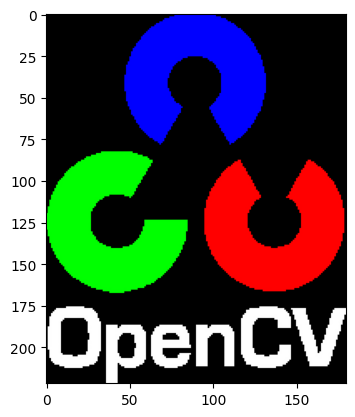

In [40]:
img2_fg = cv2.bitwise_and(img2, img2, mask=mask)
plt.imshow(img2_fg, cmap='gray')
plt.show()

#### 8. Blending of img1 and img2 using "add" function

In [41]:
dst = cv2.add(img1_bg, img2_fg)
img1[0:row, 0:column] = dst

#### 9. Visualize the blended image 

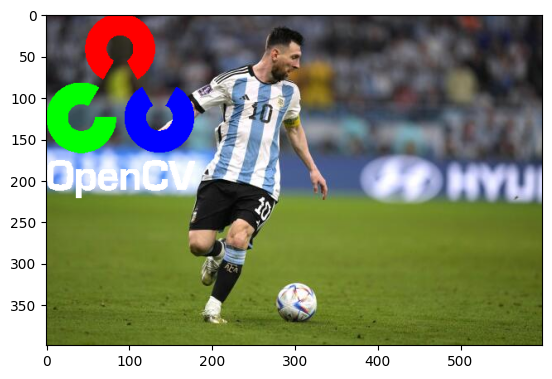

In [42]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()